In [ ]:
# %pip install prophet

In [ ]:
# %pip install pystan==2.19.1.1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.style.use('fivethirtyeight')
from prophet import Prophet

In [2]:
data = pd.read_csv('../data/metars/metars_2017_2023.csv')

In [3]:
data.head()

,Metar_id,Date_time,Day,Hour,Condition,Temperature,Wind,Gusts,Relative_hum,Pressure
0,1,2023-10-31 23:30:00,2023-10-31,23:30,Fair,8,3,0,93,1017.0
1,2,2023-10-31 23:00:00,2023-10-31,23:00,Fair,8,1,0,87,1017.0
2,3,2023-10-31 22:30:00,2023-10-31,22:30,Fair,8,0,0,93,1017.0
3,4,2023-10-31 22:00:00,2023-10-31,22:00,Clear,8,0,0,93,1017.0
4,5,2023-10-31 21:30:00,2023-10-31,21:30,Clear,8,0,0,93,1017.0


In [4]:
wind = data[['Date_time','Wind']]

In [ ]:
# wind = wind.rename(columns ={'Date_time': 'ds', 'Wind':'y'})

In [ ]:
# modelo = Prophet()

In [ ]:
# modelo.fit(wind)

In [ ]:
# futuro = modelo.make_future_dataframe(periods = 48, freq = '30min')

In [ ]:
# prediccion_w = modelo.predict(futuro)

In [ ]:
# prediccion_w

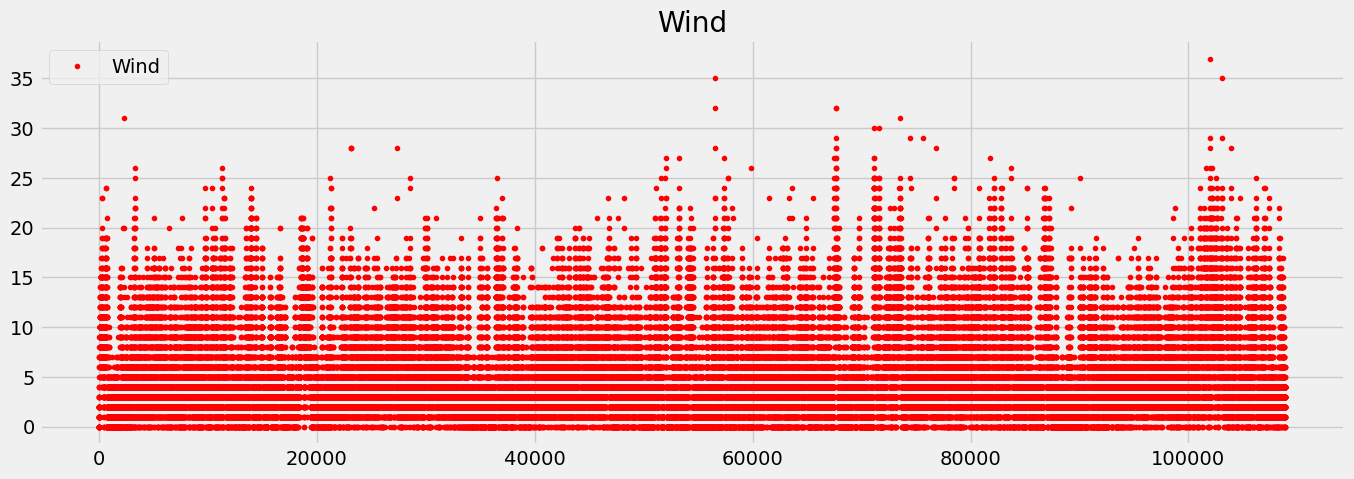

In [5]:
_=wind.plot(style='.', figsize=(15, 5), color='r', title='Wind')

In [ ]:
train=train.reset_index().rename(columns={'Datetime':'ds', 'PJME_MW':'y'})

test=test.reset_index().rename(columns={'Datetime':'ds', 'PJME_MW':'y'})

train.head()